# Regression

演算法的使用時機? 1.監督式學習 2.target為數值

## LinearRegression

還須研究的部分: 

1.如何判段模型準確? r2, r2adj, loss

2.標準化, 多項式, RBF 使用時機

In [2]:
#先將套件及資料集 import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

boston = load_boston()

#問題：透過各項變數來預測房價

In [3]:
# data = 各項變數, target = 房價
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
#data的各項變數名稱
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
#設定好 自變數 及 依變數
X = boston.data
Y = boston.target

#檢查資料筆數
len(X)

506

In [6]:
#將所有數據分成 "訓練資料" 及 "測試資料"，random_state是random seed
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=87)

In [7]:
#資料準備好後，開始 "學習函數"

#step1: 建立一個 "學習機器" ()
regr = LinearRegression()

#step2: 讓這個機器去學習 "歷史資料"
regr.fit(x_train, y_train)

#step3: 用此機器去預測數據
y_predict = regr.predict(x_test)

In [10]:
#此函數的長相，可利用機器的屬性 coef_ 及 intercept_ 找出來
equation = 'y_predict = '
for i in range(len(boston.feature_names)):
    #equation += str(regr.coef_[i]) + ' * ' + boston.feature_names[i] + ' + '
    equation += str(round(regr.coef_[i], 2)) + ' * ' + boston.feature_names[i] + ' + '
    #print(str(regr.coef_[i]) + ' * ' + boston.feature_names[i])
#equation += str(regr.intercept_)
equation += str(round(regr.intercept_, 2))
print(equation)

y_predict = -0.14 * CRIM + 0.04 * ZN + 0.02 * INDUS + 2.23 * CHAS + -17.37 * NOX + 3.81 * RM + 0.0 * AGE + -1.33 * DIS + 0.3 * RAD + -0.01 * TAX + -0.97 * PTRATIO + 0.01 * B + -0.53 * LSTAT + 35.67


0.7407624416507305

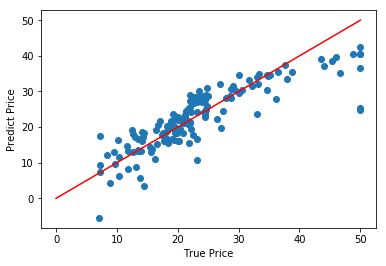

In [11]:
#評估此函數的準確率

#圖表驗證
plt.scatter(y_test, y_predict)
plt.plot([0,50], [0,50], 'r')
plt.xlabel("True Price")
plt.ylabel("Predict Price")

#數據驗證  還須研究 R**2, R**2 adj, loss...等, 該用training data or test data?
regr.score(x_train, y_train)

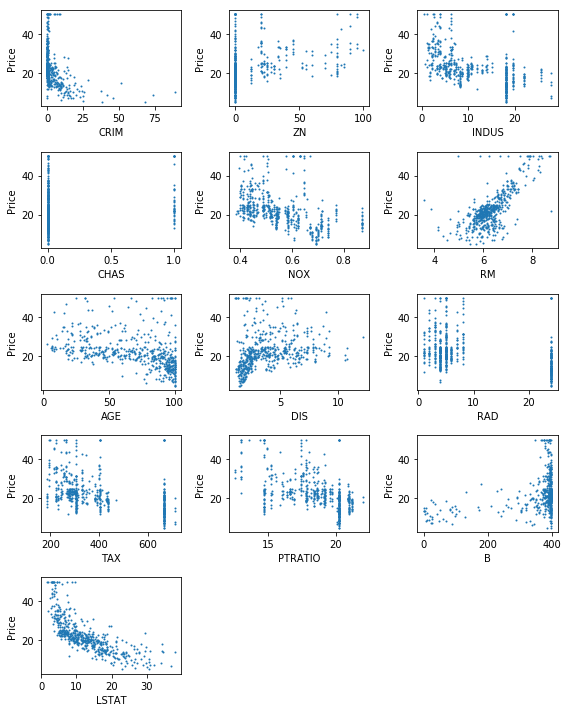

In [12]:
#觀察每個變數單獨與房價的關係

plt.figure(figsize=(8,10))
for i, feature in enumerate(boston.feature_names):
    plt.subplot(5, 3, i+1)
    plt.scatter(X[:,i], Y, s=1)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.tight_layout()
    
    

## 標準化再進行 迴歸分析